In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

/Users/wat/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
macro_df = pd.read_csv("../input/macro.csv")

In [30]:
# 数据基本信息
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [31]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [3]:
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
timestamp                                     2484 non-null object
oil_urals                                     2484 non-null float64
gdp_quart                                     2394 non-null float64
gdp_quart_growth                              2394 non-null float64
cpi                                           2453 non-null float64
ppi                                           2453 non-null float64
gdp_deflator                                  2119 non-null float64
balance_trade                                 2453 non-null float64
balance_trade_growth                          2394 non-null float64
usdrub                                        2481 non-null float64
eurrub                                        2481 non-null float64
brent                                         2481 non-null float64
net_capital_export                            2088 non-null float64
gdp_annua

In [6]:
train_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
id                                       30471 non-null int64
timestamp                                30471 non-null object
full_sq                                  30471 non-null int64
life_sq                                  24088 non-null float64
floor                                    30304 non-null float64
max_floor                                20899 non-null float64
material                                 20899 non-null float64
build_year                               16866 non-null float64
num_room                                 20899 non-null float64
kitch_sq                                 20899 non-null float64
state                                    16912 non-null float64
product_type                             30471 non-null object
sub_area                                 30471 non-null object
area_m                                   30471 non-null float64
r

In [33]:
for i in train_df:
    print i, ':\t', train_df[i].isnull().values.any()

id :	False
timestamp :	False
full_sq :	False
life_sq :	True
floor :	True
max_floor :	True
material :	True
build_year :	True
num_room :	True
kitch_sq :	True
state :	True
product_type :	False
sub_area :	False
area_m :	False
raion_popul :	False
green_zone_part :	False
indust_part :	False
children_preschool :	False
preschool_quota :	True
preschool_education_centers_raion :	False
children_school :	False
school_quota :	True
school_education_centers_raion :	False
school_education_centers_top_20_raion :	False
hospital_beds_raion :	True
healthcare_centers_raion :	False
university_top_20_raion :	False
sport_objects_raion :	False
additional_education_raion :	False
culture_objects_top_25 :	False
culture_objects_top_25_raion :	False
shopping_centers_raion :	False
office_raion :	False
thermal_power_plant_raion :	False
incineration_raion :	False
oil_chemistry_raion :	False
radiation_raion :	False
railroad_terminal_raion :	False
big_market_raion :	False
nuclear_reactor_raion :	False
detention_facility

In [34]:
# 数据填充
# TODO：life_sq, floor, max_floor, material, build_year, num_room, kitch_sq, state
train_X = train_df.drop('price_doc', axis = 1)
train_y = train_df['price_doc']
test_X = test_df
# full_data = [train_X, test_X]
full_data = pd.concat([train_X, test_X])
full_data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43.00,27.00,4.0,NaN,NaN,NaN,NaN,NaN,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34.00,19.00,3.0,NaN,NaN,NaN,NaN,NaN,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43.00,29.00,2.0,NaN,NaN,NaN,NaN,NaN,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89.00,50.00,9.0,NaN,NaN,NaN,NaN,NaN,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77.00,77.00,4.0,NaN,NaN,NaN,NaN,NaN,...,552,319,108,17,135,236,2,91,195,14
5,6,2011-09-06,67.00,46.00,14.0,NaN,NaN,NaN,NaN,NaN,...,155,62,14,1,53,78,1,20,113,17
6,7,2011-09-08,25.00,14.00,10.0,NaN,NaN,NaN,NaN,NaN,...,144,81,16,3,38,80,1,27,127,8
7,8,2011-09-09,44.00,44.00,5.0,NaN,NaN,NaN,NaN,NaN,...,36,9,4,0,11,18,1,0,47,4
8,9,2011-09-10,42.00,27.00,5.0,NaN,NaN,NaN,NaN,NaN,...,69,19,8,1,18,34,1,3,85,11
9,10,2011-09-13,36.00,21.00,9.0,NaN,NaN,NaN,NaN,NaN,...,30,19,13,0,10,20,1,3,67,1


In [35]:
print '====train_X:======'
print train_X.shape
print '====train_y:======'
print train_y.shape
print '====test_X:======='
print test_X.shape
print '====full_data:===='
print full_data.shape

====train_X:======
(30471, 291)
====train_y:======
(30471,)
====test_X:=======
(7662, 291)
====full_data:====
(38133, 291)


In [36]:
full_data['life_sq'].fillna(full_data['life_sq'].mean(), inplace = True)
full_data['floor'].fillna(full_data['floor'].mode(), inplace = True)
full_data['max_floor'].fillna(full_data['max_floor'].mode()[0], inplace = True)
full_data['material'].fillna(full_data['material'].mode()[0], inplace = True)
full_data['num_room'].fillna(full_data['num_room'].mode()[0], inplace = True)
full_data['kitch_sq'].fillna(full_data['kitch_sq'].mean(), inplace = True)

In [37]:
full_data['build_year'].fillna(1880, inplace = True)
full_data.loc[full_data['build_year'] == 20052009,'build_year'] = 2009
full_data.loc[full_data['build_year'] == 4965, 'build_year'] = 1965
full_data.loc[full_data['build_year'] < 1880, 'build_year'] = 1880
print full_data['build_year'].max()
print full_data['build_year'].min()

2019.0
1880.0


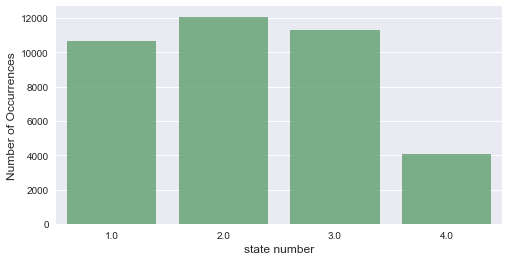

In [38]:
# state 缺失值平均分配到四个州
# TODO：类别特征，考虑处理成哑特征
full_data.loc[full_data['state'] == 33, 'state'] = 3
# print full_data[full_data['state'] == 33]['state'].value_counts()
state_min = full_data['state'].min()
state_max = full_data['state'].max()
state_null_count = full_data['state'].isnull().sum()
state_null_random_list = np.random.randint(state_min, state_max + 1, size = state_null_count)

full_data.loc[np.isnan(full_data['state']), 'state'] = state_null_random_list

int_level = full_data['state'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('state number', fontsize=12)
plt.show()

In [39]:
features_to_use = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq']

In [40]:
full_data[features_to_use].head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq
0,43.0,27.0,4.0,17.0,1.0,1880.0,2.0,6.543995
1,34.0,19.0,3.0,17.0,1.0,1880.0,2.0,6.543995
2,43.0,29.0,2.0,17.0,1.0,1880.0,2.0,6.543995
3,89.0,50.0,9.0,17.0,1.0,1880.0,2.0,6.543995
4,77.0,77.0,4.0,17.0,1.0,1880.0,2.0,6.543995
5,67.0,46.0,14.0,17.0,1.0,1880.0,2.0,6.543995
6,25.0,14.0,10.0,17.0,1.0,1880.0,2.0,6.543995
7,44.0,44.0,5.0,17.0,1.0,1880.0,2.0,6.543995
8,42.0,27.0,5.0,17.0,1.0,1880.0,2.0,6.543995
9,36.0,21.0,9.0,17.0,1.0,1880.0,2.0,6.543995


In [41]:
train_X = full_data[:train_df.shape[0]].copy()
test_X = full_data[train_df.shape[0]:].copy()
print train_X[features_to_use].head()
print test_X[features_to_use].head()

   full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
0     43.0     27.0    4.0       17.0       1.0      1880.0       2.0   
1     34.0     19.0    3.0       17.0       1.0      1880.0       2.0   
2     43.0     29.0    2.0       17.0       1.0      1880.0       2.0   
3     89.0     50.0    9.0       17.0       1.0      1880.0       2.0   
4     77.0     77.0    4.0       17.0       1.0      1880.0       2.0   

   kitch_sq  
0  6.543995  
1  6.543995  
2  6.543995  
3  6.543995  
4  6.543995  
   full_sq   life_sq  floor  max_floor  material  build_year  num_room  \
0     39.0  20.70000    2.0        9.0       1.0      1998.0       1.0   
1     79.2  34.03346    8.0       17.0       1.0      1880.0       3.0   
2     40.5  25.10000    3.0        5.0       2.0      1960.0       2.0   
3     62.8  36.00000   17.0       17.0       1.0      2016.0       2.0   
4     40.0  40.00000   17.0       17.0       1.0      1880.0       1.0   

   kitch_sq  
0       8.9  
1   

In [45]:
import xgboost as xgb

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}


dtrain = xgb.DMatrix(train_X[features_to_use], train_y)
dtest = xgb.DMatrix(test_X[features_to_use])

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

[0]	cv-test-rmse:8240087.500000	cv-train-rmse:8237318.666667
[1]	cv-test-rmse:7914398.500000	cv-train-rmse:7907291.000000
[2]	cv-test-rmse:7606442.000000	cv-train-rmse:7596603.833333
[3]	cv-test-rmse:7310896.500000	cv-train-rmse:7297229.333333
[4]	cv-test-rmse:7038746.666667	cv-train-rmse:7021503.833333
[5]	cv-test-rmse:6792805.500000	cv-train-rmse:6770609.833333
[6]	cv-test-rmse:6551602.166667	cv-train-rmse:6525005.500000
[7]	cv-test-rmse:6337505.500000	cv-train-rmse:6306023.000000
[8]	cv-test-rmse:6123940.166667	cv-train-rmse:6089317.833333
[9]	cv-test-rmse:5919713.000000	cv-train-rmse:5879304.500000
[10]	cv-test-rmse:5734428.166667	cv-train-rmse:5688443.666667
[11]	cv-test-rmse:5560476.166667	cv-train-rmse:5510054.500000
[12]	cv-test-rmse:5398466.500000	cv-train-rmse:5345260.166667
[13]	cv-test-rmse:5241203.833333	cv-train-rmse:5184182.333333
[14]	cv-test-rmse:5105057.000000	cv-train-rmse:5041519.500000
[15]	cv-test-rmse:4976332.166667	cv-train-rmse:4907724.500000
[16]	cv-test-rmse:

[135]	cv-test-rmse:3309200.916667	cv-train-rmse:2886904.416667
[136]	cv-test-rmse:3308190.333333	cv-train-rmse:2884947.916667
[137]	cv-test-rmse:3307663.833333	cv-train-rmse:2883725.416667
[138]	cv-test-rmse:3307766.666667	cv-train-rmse:2882083.250000
[139]	cv-test-rmse:3307450.583333	cv-train-rmse:2879264.750000
[140]	cv-test-rmse:3306754.416667	cv-train-rmse:2878000.333333
[141]	cv-test-rmse:3306705.166667	cv-train-rmse:2876720.666667
[142]	cv-test-rmse:3306007.583333	cv-train-rmse:2875626.083333
[143]	cv-test-rmse:3305781.250000	cv-train-rmse:2874239.333333
[144]	cv-test-rmse:3305373.333333	cv-train-rmse:2873038.416667
[145]	cv-test-rmse:3305204.583333	cv-train-rmse:2871507.166667
[146]	cv-test-rmse:3305384.083333	cv-train-rmse:2870246.416667
[147]	cv-test-rmse:3304362.250000	cv-train-rmse:2868271.083333
[148]	cv-test-rmse:3304221.416667	cv-train-rmse:2866885.416667
[149]	cv-test-rmse:3303746.750000	cv-train-rmse:2865537.750000
[150]	cv-test-rmse:3302736.833333	cv-train-rmse:2863146

[268]	cv-test-rmse:3274508.500000	cv-train-rmse:2725140.166667
[269]	cv-test-rmse:3274316.333333	cv-train-rmse:2724324.333333
[270]	cv-test-rmse:3274258.583333	cv-train-rmse:2723187.416667
[271]	cv-test-rmse:3273965.000000	cv-train-rmse:2722214.916667
[272]	cv-test-rmse:3274016.166667	cv-train-rmse:2720969.916667
[273]	cv-test-rmse:3274140.833333	cv-train-rmse:2719824.666667
[274]	cv-test-rmse:3273635.166667	cv-train-rmse:2718751.083333
[275]	cv-test-rmse:3273898.666667	cv-train-rmse:2718069.500000
[276]	cv-test-rmse:3273545.583333	cv-train-rmse:2717455.750000
[277]	cv-test-rmse:3273189.666667	cv-train-rmse:2716799.666667
[278]	cv-test-rmse:3273299.166667	cv-train-rmse:2716048.916667
[279]	cv-test-rmse:3273142.916667	cv-train-rmse:2715418.583333
[280]	cv-test-rmse:3272763.750000	cv-train-rmse:2713451.833333
[281]	cv-test-rmse:3272781.166667	cv-train-rmse:2712472.916667
[282]	cv-test-rmse:3272666.500000	cv-train-rmse:2711527.750000
[283]	cv-test-rmse:3272029.833333	cv-train-rmse:2709877

[402]	cv-test-rmse:3266689.500000	cv-train-rmse:2621729.833333
[403]	cv-test-rmse:3267025.583333	cv-train-rmse:2621493.750000
[404]	cv-test-rmse:3267031.750000	cv-train-rmse:2621007.500000
[405]	cv-test-rmse:3267102.333333	cv-train-rmse:2620077.333333
[406]	cv-test-rmse:3267098.250000	cv-train-rmse:2619625.083333
[407]	cv-test-rmse:3267133.916667	cv-train-rmse:2618983.833333
[408]	cv-test-rmse:3267233.166667	cv-train-rmse:2618509.583333
[409]	cv-test-rmse:3267409.250000	cv-train-rmse:2617818.333333
[410]	cv-test-rmse:3267371.500000	cv-train-rmse:2617317.333333
[411]	cv-test-rmse:3267459.166667	cv-train-rmse:2616637.000000
[412]	cv-test-rmse:3267430.000000	cv-train-rmse:2616342.166667
[413]	cv-test-rmse:3267359.416667	cv-train-rmse:2615674.500000
[414]	cv-test-rmse:3267176.750000	cv-train-rmse:2615141.000000
[415]	cv-test-rmse:3267106.000000	cv-train-rmse:2614505.083333
[416]	cv-test-rmse:3267218.500000	cv-train-rmse:2614000.583333
[417]	cv-test-rmse:3267110.750000	cv-train-rmse:2613336

[534]	cv-test-rmse:3272435.166667	cv-train-rmse:2554411.333333
[535]	cv-test-rmse:3272445.750000	cv-train-rmse:2554089.250000
[536]	cv-test-rmse:3272474.750000	cv-train-rmse:2553824.583333
[537]	cv-test-rmse:3272369.416667	cv-train-rmse:2553461.416667
[538]	cv-test-rmse:3272384.000000	cv-train-rmse:2553145.583333
[539]	cv-test-rmse:3273175.000000	cv-train-rmse:2552340.833333
[540]	cv-test-rmse:3273197.250000	cv-train-rmse:2552061.166667
[541]	cv-test-rmse:3273202.500000	cv-train-rmse:2551588.500000
[542]	cv-test-rmse:3273246.833333	cv-train-rmse:2551261.416667
[543]	cv-test-rmse:3273341.333333	cv-train-rmse:2551085.000000
[544]	cv-test-rmse:3273361.666667	cv-train-rmse:2550842.916667
[545]	cv-test-rmse:3273717.333333	cv-train-rmse:2550566.416667
[546]	cv-test-rmse:3273315.166667	cv-train-rmse:2549789.666667
[547]	cv-test-rmse:3273384.833333	cv-train-rmse:2549413.750000
[548]	cv-test-rmse:3273373.583333	cv-train-rmse:2548843.250000
[549]	cv-test-rmse:3273374.583333	cv-train-rmse:2548533

[667]	cv-test-rmse:3276156.583333	cv-train-rmse:2489654.083333
[668]	cv-test-rmse:3276286.916667	cv-train-rmse:2489460.666667
[669]	cv-test-rmse:3276339.166667	cv-train-rmse:2489126.750000
[670]	cv-test-rmse:3276170.000000	cv-train-rmse:2488960.083333
[671]	cv-test-rmse:3276250.333333	cv-train-rmse:2488386.250000
[672]	cv-test-rmse:3276145.416667	cv-train-rmse:2488087.333333
[673]	cv-test-rmse:3276295.500000	cv-train-rmse:2487998.666667
[674]	cv-test-rmse:3276635.166667	cv-train-rmse:2487562.250000
[675]	cv-test-rmse:3276850.750000	cv-train-rmse:2487190.333333
[676]	cv-test-rmse:3276756.916667	cv-train-rmse:2486638.250000
[677]	cv-test-rmse:3276747.583333	cv-train-rmse:2486322.583333
[678]	cv-test-rmse:3276938.166667	cv-train-rmse:2486120.916667
[679]	cv-test-rmse:3277061.500000	cv-train-rmse:2485691.333333
[680]	cv-test-rmse:3277115.000000	cv-train-rmse:2485516.916667
[681]	cv-test-rmse:3277114.250000	cv-train-rmse:2485306.916667
[682]	cv-test-rmse:3277310.583333	cv-train-rmse:2484936

[799]	cv-test-rmse:3282793.583333	cv-train-rmse:2439015.833333
[800]	cv-test-rmse:3282933.416667	cv-train-rmse:2438570.416667
[801]	cv-test-rmse:3283125.750000	cv-train-rmse:2437836.000000
[802]	cv-test-rmse:3283185.000000	cv-train-rmse:2437385.000000
[803]	cv-test-rmse:3283218.583333	cv-train-rmse:2436825.166667
[804]	cv-test-rmse:3283277.500000	cv-train-rmse:2436526.750000
[805]	cv-test-rmse:3283275.833333	cv-train-rmse:2436082.333333
[806]	cv-test-rmse:3283357.916667	cv-train-rmse:2435538.500000
[807]	cv-test-rmse:3283401.166667	cv-train-rmse:2435166.000000
[808]	cv-test-rmse:3283619.666667	cv-train-rmse:2434656.750000
[809]	cv-test-rmse:3283775.083333	cv-train-rmse:2434274.416667
[810]	cv-test-rmse:3283821.333333	cv-train-rmse:2434171.083333
[811]	cv-test-rmse:3283864.750000	cv-train-rmse:2433916.500000
[812]	cv-test-rmse:3283733.500000	cv-train-rmse:2433727.500000
[813]	cv-test-rmse:3283702.416667	cv-train-rmse:2433490.416667
[814]	cv-test-rmse:3283572.750000	cv-train-rmse:2432856

[936]	cv-test-rmse:3290813.583333	cv-train-rmse:2386672.333333
[937]	cv-test-rmse:3290821.083333	cv-train-rmse:2386420.583333
[938]	cv-test-rmse:3290811.666667	cv-train-rmse:2386148.083333
[939]	cv-test-rmse:3290802.583333	cv-train-rmse:2385913.166667
[940]	cv-test-rmse:3290975.750000	cv-train-rmse:2385689.500000
[941]	cv-test-rmse:3290911.916667	cv-train-rmse:2385290.833333
[942]	cv-test-rmse:3291122.500000	cv-train-rmse:2384790.000000
[943]	cv-test-rmse:3291220.583333	cv-train-rmse:2384526.750000
[944]	cv-test-rmse:3291362.500000	cv-train-rmse:2384171.833333
[945]	cv-test-rmse:3291466.333333	cv-train-rmse:2383731.500000
[946]	cv-test-rmse:3291472.166667	cv-train-rmse:2383418.333333
[947]	cv-test-rmse:3291575.333333	cv-train-rmse:2383110.166667
[948]	cv-test-rmse:3291725.583333	cv-train-rmse:2382696.166667
[949]	cv-test-rmse:3291719.583333	cv-train-rmse:2382306.333333
[950]	cv-test-rmse:3291878.583333	cv-train-rmse:2382074.250000
[951]	cv-test-rmse:3291918.833333	cv-train-rmse:2381778

TypeError: list indices must be integers, not list

In [46]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 396)

predict_y = model.predict(dtest)
id_test = test_X.id
output = pd.DataFrame({'id': id_test, 'price_doc': predict_y})
output.head()

,id,price_doc
0,30474,5474335.5
1,30475,7712406.5
2,30476,6267523.0
3,30477,6930223.0
4,30478,4891112.0


In [47]:
output.to_csv('output/first_try.csv', index=False)